In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [3]:
df=pd.read_csv('epl_final.csv')
df

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,2024/25,2025-05-04,Brentford,Man United,4,3,H,2,1,H,...,6,5,7,4,8,10,0,2,0,0
9376,2024/25,2025-05-04,Brighton,Newcastle,1,1,D,1,0,H,...,2,5,1,4,15,10,2,1,0,0
9377,2024/25,2025-05-04,West Ham,Tottenham,1,1,D,1,1,D,...,2,2,1,3,18,15,2,2,0,0
9378,2024/25,2025-05-04,Chelsea,Liverpool,3,1,H,1,0,H,...,7,2,3,6,10,11,2,2,0,0


In [4]:
df=df.drop(columns=['Season','MatchDate','HalfTimeHomeGoals','HalfTimeAwayGoals','HalfTimeResult'])

In [5]:
print(df.columns)

Index(['HomeTeam', 'AwayTeam', 'FullTimeHomeGoals', 'FullTimeAwayGoals',
       'FullTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards'],
      dtype='object')


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

HomeTeam             0
AwayTeam             0
FullTimeHomeGoals    0
FullTimeAwayGoals    0
FullTimeResult       0
HomeShots            0
AwayShots            0
HomeShotsOnTarget    0
AwayShotsOnTarget    0
HomeCorners          0
AwayCorners          0
HomeFouls            0
AwayFouls            0
HomeYellowCards      0
AwayYellowCards      0
HomeRedCards         0
AwayRedCards         0
dtype: int64

In [1]:
import pandas as pd
df = pd.read_csv("epl_final.csv")
df = df[['HomeTeam', 'AwayTeam', 'FullTimeHomeGoals', 'FullTimeAwayGoals',
       'FullTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards']]
df.to_csv("cleaned_dataset_for_matchwinner.csv",index=False)

In [2]:
import pandas as pd
file_path="cleaned_dataset_for_matchwinner.csv"
df=pd.read_csv(file_path)
categorical_cols=df.select_dtypes(include=['object']).columns
print("Categorical Columns",categorical_cols.tolist())

Categorical Columns ['HomeTeam', 'AwayTeam', 'FullTimeResult']


In [3]:
from sklearn.preprocessing import LabelEncoder
df_label = df.copy()
le_home = LabelEncoder()
le_away = LabelEncoder()
df_label['HomeTeam'] = le_home.fit_transform(df_label['HomeTeam'])
df_label['AwayTeam'] = le_away.fit_transform(df_label['AwayTeam'])
df_label['FullTimeResult'] = le_away.fit_transform(df_label['FullTimeResult'])
print(df_label[['HomeTeam', 'AwayTeam','FullTimeResult']].head())

   HomeTeam  AwayTeam  FullTimeResult
0        12        26               2
1        13        43               2
2        14        28               0
3        16        36               1
4        22        17               2


In [4]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['HomeTeam', 'AwayTeam','FullTimeResult'], drop_first=True)
print(df_onehot.shape)
print(df_onehot.head())

(9380, 106)
   FullTimeHomeGoals  FullTimeAwayGoals  HomeShots  AwayShots  \
0                  4                  0         17          8   
1                  4                  2         17         12   
2                  1                  3          6         16   
3                  2                  2          6         13   
4                  2                  0         17         12   

   HomeShotsOnTarget  AwayShotsOnTarget  HomeCorners  AwayCorners  HomeFouls  \
0                 14                  4            6            6         13   
1                 10                  5            7            7         19   
2                  3                  9            8            4         15   
3                  4                  6            5            8         11   
4                  8                  6            6            4         21   

   AwayFouls  ...  AwayTeam_Sunderland  AwayTeam_Swansea  AwayTeam_Tottenham  \
0         12  ...                Fal

In [8]:
import pandas as pd
df = pd.read_csv("cleaned_dataset_for_matchwinner.csv")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
df_no_outliers = remove_outliers(df, num_cols)
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (9380, 17)
After removing outliers: (6063, 17)


Matplotlib is building the font cache; this may take a moment.


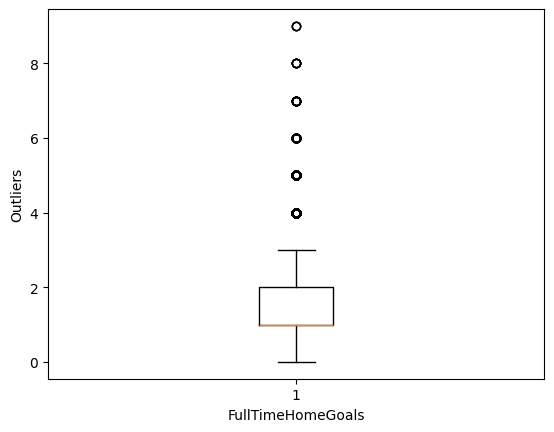

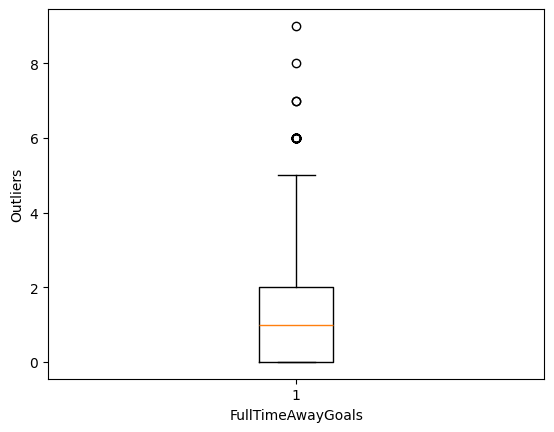

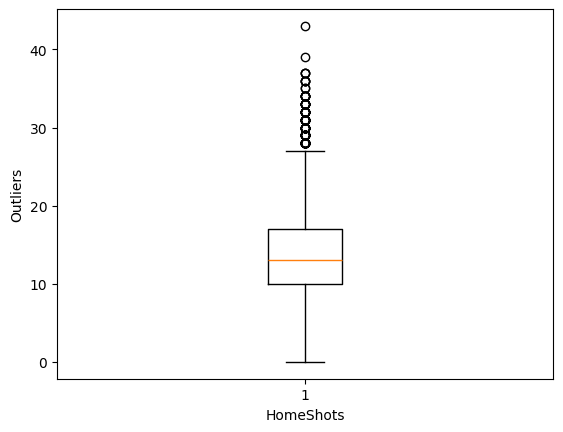

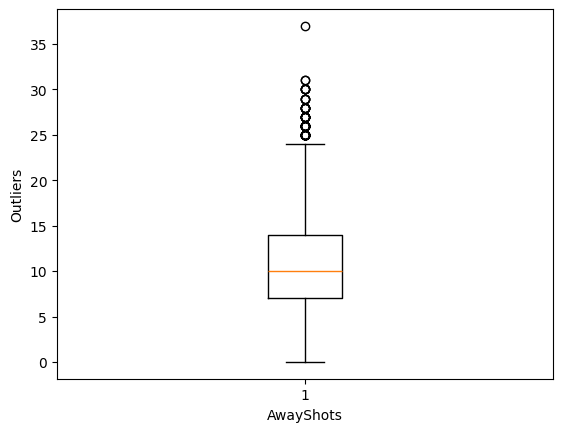

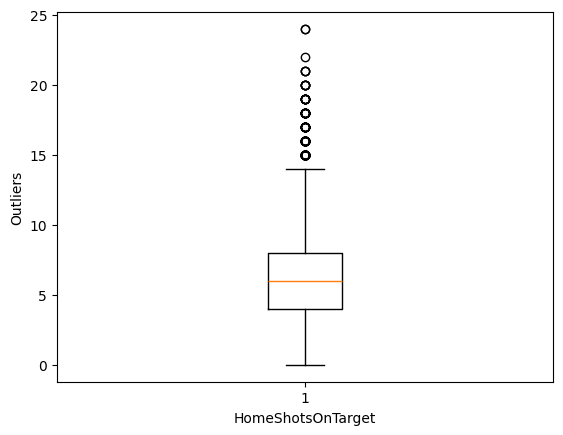

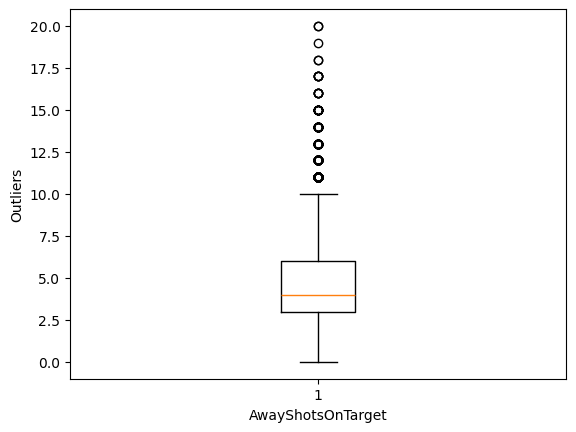

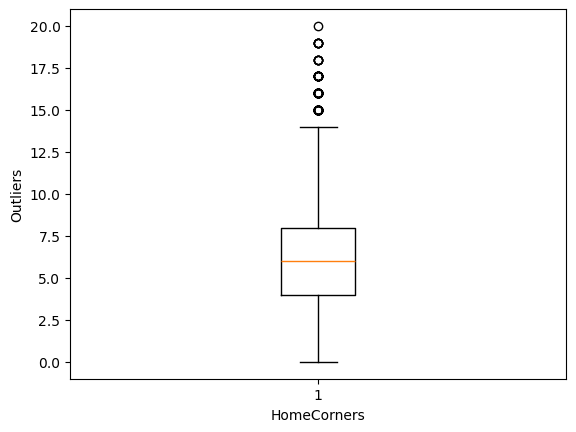

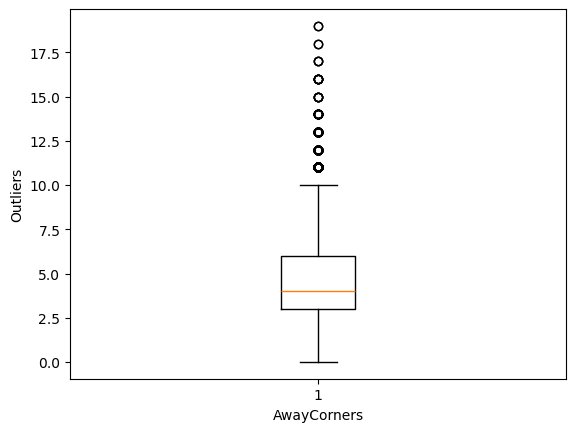

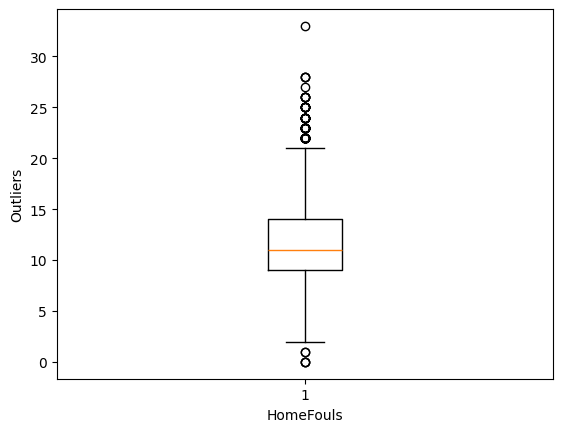

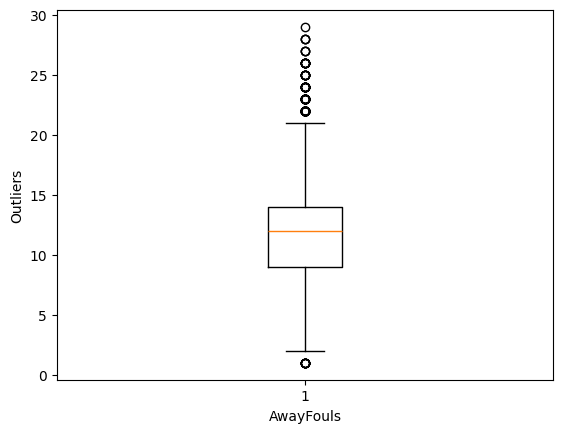

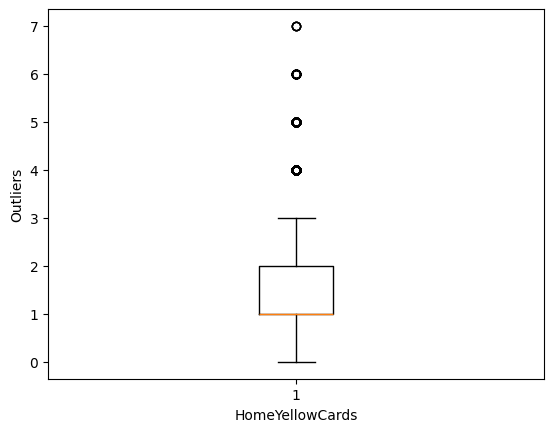

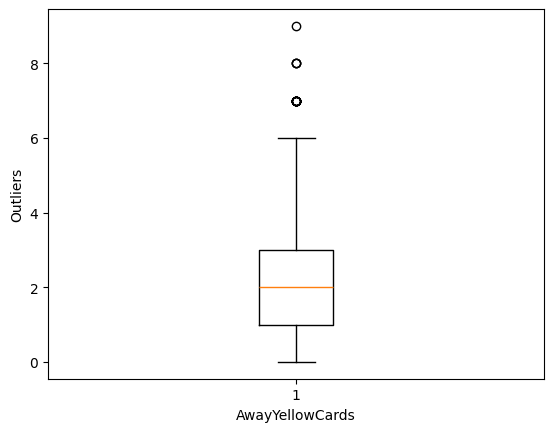

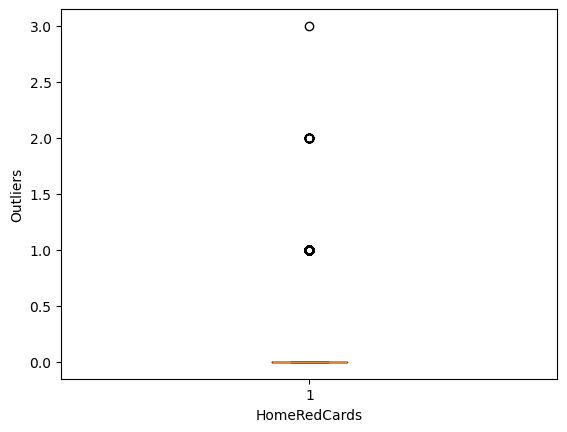

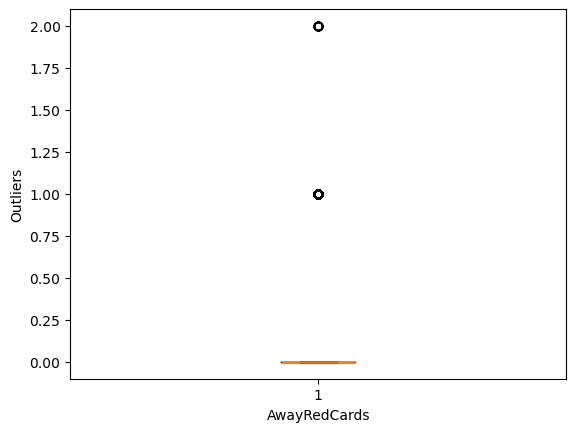

In [11]:
import matplotlib.pyplot as plt
import numpy as np
for itr in df.columns:
    if df[itr].dtype == np.int64:   # check if column is integer type
        plt.boxplot(df[itr].values)
        plt.xlabel(itr)
        plt.ylabel('Outliers')
        plt.show()

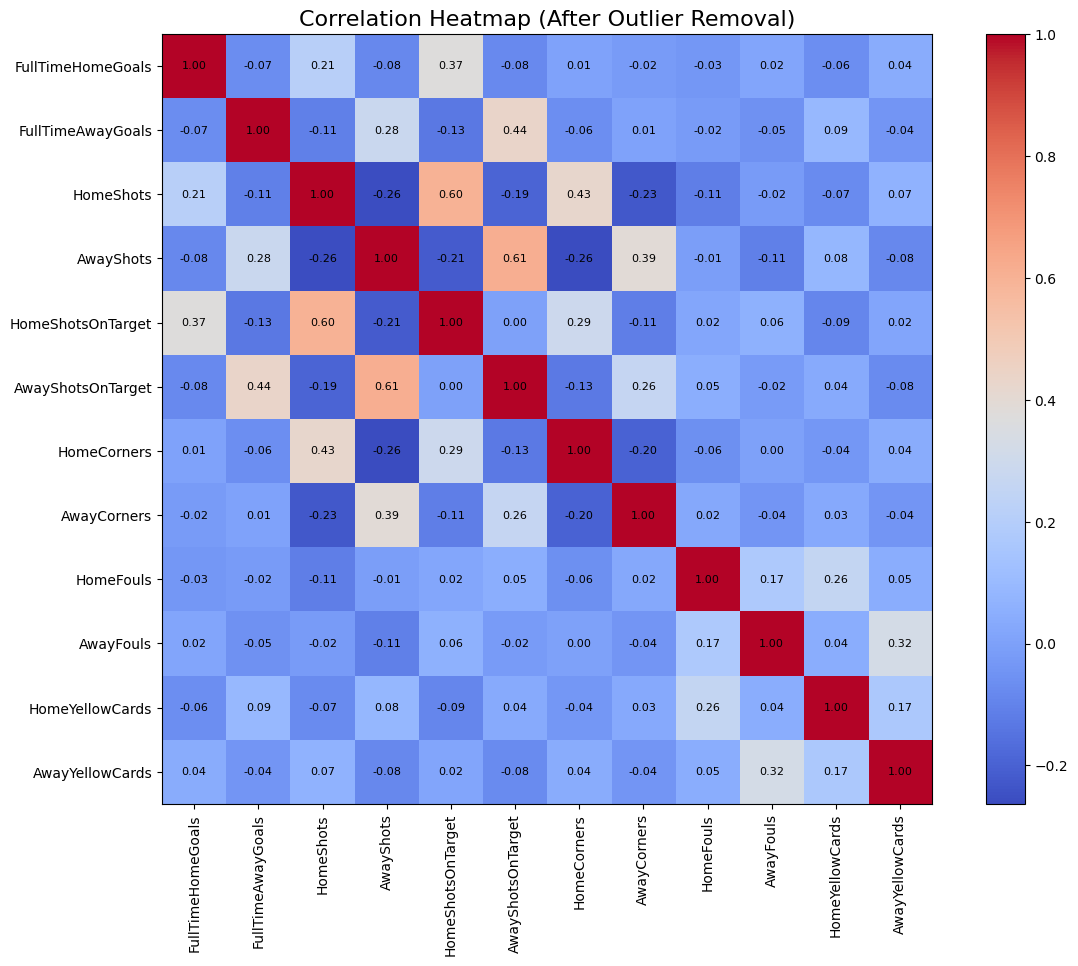

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 1. only selecting numeric columns that r
num_cols = df_no_outliers.select_dtypes(include=[np.number]).columns.tolist()

# 2. Remove constant columns
cleaned = df_no_outliers[num_cols].loc[:, df_no_outliers[num_cols].apply(pd.Series.nunique) > 1]

# 3. Replace NaN values with 0
cleaned = cleaned.fillna(0)

# 4. Compute correlation
corr = cleaned.corr()

# 5. Plot heatmap
plt.figure(figsize=(14,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black", fontsize=8)

plt.title("Correlation Heatmap (After Outlier Removal)", fontsize=16)
plt.show()

In [25]:
print(df_no_outliers['HomeShots'].corr(df_no_outliers['AwayShots']))

-0.256411305109005


In [26]:
print(df_no_outliers[['HomeShots','AwayShots']].head(20))


    HomeShots  AwayShots
3           6         13
4          17         12
5           5          5
6          16          3
8          20         15
9          19          9
11         12         14
12         13         15
13         12         11
20          8         13
21         12          7
22         14          9
23         14          9
25         15         10
26         14          9
27         17          8
28         12         11
32         11         11
35         13         13
36          9          5


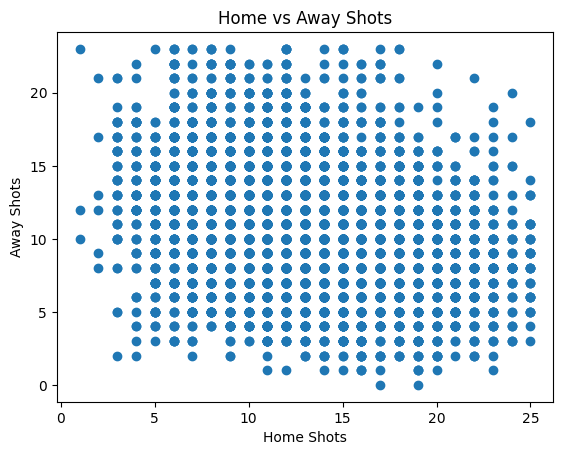

In [27]:
import matplotlib.pyplot as plt

plt.scatter(df_no_outliers['HomeShots'], df_no_outliers['AwayShots'])
plt.xlabel("Home Shots")
plt.ylabel("Away Shots")
plt.title("Home vs Away Shots")
plt.show()


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['FullTimeResult'] = le.fit_transform(df['FullTimeResult'])

In [69]:
x=df.drop(columns='FullTimeResult')
y=df['FullTimeResult']

In [70]:
x

,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,Charlton,Man City,4,0,17,8,14,4,6,6,13,12,1,2,0,0
1,Chelsea,West Ham,4,2,17,12,10,5,7,7,19,14,1,2,0,0
2,Coventry,Middlesbrough,1,3,6,16,3,9,8,4,15,21,5,3,1,0
3,Derby,Southampton,2,2,6,13,4,6,5,8,11,13,1,1,0,0
4,Leeds,Everton,2,0,17,12,8,6,6,4,21,20,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,Brentford,Man United,4,3,12,14,6,5,7,4,8,10,0,2,0,0
9376,Brighton,Newcastle,1,1,5,13,2,5,1,4,15,10,2,1,0,0
9377,West Ham,Tottenham,1,1,11,7,2,2,1,3,18,15,2,2,0,0
9378,Chelsea,Liverpool,3,1,17,11,7,2,3,6,10,11,2,2,0,0


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [86]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9920

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.99      0.98      0.98       462
           2       0.99      1.00      1.00       860

    accuracy                           0.99      1876
   macro avg       0.99      0.99      0.99      1876
weighted avg       0.99      0.99      0.99      1876

Confusion Matrix:
 [[549   5   0]
 [  3 452   7]
 [  0   0 860]]


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
file_path = "cleaned_dataset_for_matchwinner.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
# Drop the target and the duplicate 'FTR' column to prevent data leakage
X = df.drop(['FullTimeResult', 'FTR'], axis=1, errors='ignore')
y = df['FullTimeResult']

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['HomeTeam', 'AwayTeam'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9931

Classification Report:
               precision    recall  f1-score   support

           A       0.99      1.00      1.00       539
           D       0.99      0.98      0.99       474
           H       0.99      1.00      0.99       863

    accuracy                           0.99      1876
   macro avg       0.99      0.99      0.99      1876
weighted avg       0.99      0.99      0.99      1876

Confusion Matrix:
 [[537   2   0]
 [  2 466   6]
 [  1   2 860]]


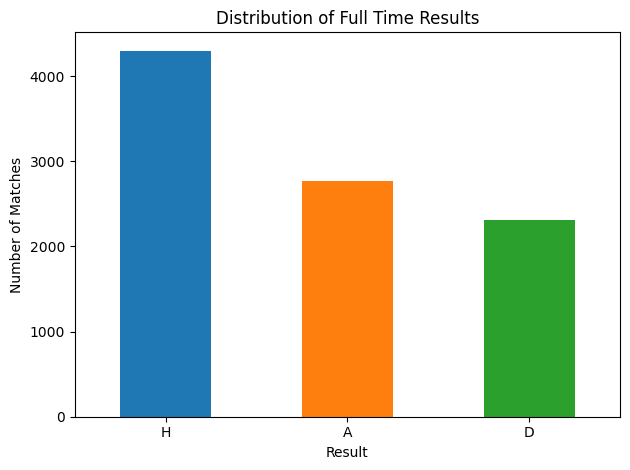

In [91]:
import matplotlib.pyplot as plt

# Load your cleaned dataset
file_path = "cleaned_dataset_for_matchwinner.csv"
df = pd.read_csv(file_path)

# Get the value counts of the 'FullTimeResult' column
result_counts = df['FullTimeResult'].value_counts()

# Create the bar chart
result_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribution of Full Time Results')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [94]:
import pandas as pd
file_path = "cleaned_dataset_for_matchwinner.csv"
df = pd.read_csv(file_path)

# This line will show you all the columns in your file.
print("All columns in the DataFrame:", df.columns)

All columns in the DataFrame: Index(['HomeTeam', 'AwayTeam', 'FullTimeHomeGoals', 'FullTimeAwayGoals',
       'FullTimeResult', 'HomeShots', 'AwayShots', 'HomeShotsOnTarget',
       'AwayShotsOnTarget', 'HomeCorners', 'AwayCorners', 'HomeFouls',
       'AwayFouls', 'HomeYellowCards', 'AwayYellowCards', 'HomeRedCards',
       'AwayRedCards'],
      dtype='object')


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the cleaned dataset
file_path = "cleaned_dataset_for_matchwinner.csv"
df = pd.read_csv(file_path)

# Separate features (X) and target (y)
# Drop the goal columns that are causing data leakage.
X = df.drop(['FullTimeResult', 'FullTimeHomeGoals', 'FullTimeAwayGoals'], axis=1)
y = df['FullTimeResult']

# One-hot encode the categorical features
X = pd.get_dummies(X, columns=['HomeTeam', 'AwayTeam'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5666

Classification Report:
               precision    recall  f1-score   support

           A       0.54      0.60      0.57       539
           D       0.33      0.08      0.12       474
           H       0.60      0.81      0.69       863

    accuracy                           0.57      1876
   macro avg       0.49      0.50      0.46      1876
weighted avg       0.52      0.57      0.51      1876

Confusion Matrix:
 [[324  39 176]
 [153  36 285]
 [126  34 703]]
